In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [38]:
rentals = pd.read_csv(r"C:\Users\tigju\Documents\Lambda School\Labs\cityspire-f-ds\notebooks\rentals\data\rentals_2010_2020.csv",encoding='utf-8')

In [39]:
print(rentals.shape)
rentals.head()

(106, 86)


RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0    102001                       United States         0   1368.0     1376   
1    394913                        New York, NY         1   2329.0     2351   
2    753899  Los Angeles-Long Beach-Anaheim, CA         2   1866.0     1886   
3    394463                         Chicago, IL         3   1448.0     1461   
4    394514               Dallas-Fort Worth, TX         4   1202.0     1202   

   2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  \
0     1379     1395     1408     1419     1428     1433     1433     1432   
1     2355     2385     2414     2434     2447     2455     2456     2455   
2     1891     1916     1939     1962     1985     1996     2003     2010   
3     1464     1482     1498     1510     1519     1521     1517     1508   
4     1207     1219     1232     1244     1251     1257     1257     1252   

   2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  \
0     1431     1432     1437     1445     1455     1468     1478     1487   
1     2455     2452     2459     2471     2491     2520     2533     2550   
2     2016     2020     2033     2039     2056     2073     2086     2097   
3     1506     1504     1509     1515     1505     1516     1538     1555   
4     1254     1261     1261     1268     1282     1294     1303     1313   

   2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  \
0     1493     1497     1499     1498     1500     1499     1505     1513   
1     2560     2563     2570     2570     2562     2558     2562     2565   
2     2115     2129     2143     2146     2159     2163     2176     2186   
3     1563     1570     1566     1556     1549     1549     1556     1566   
4     1318     1323     1322     1320     1324     1319     1323     1334   

   2016-03  2016-04  2016-05  2016-06  2016-07  2016-08  2016-09  2016-10  \
0     1523     1534     1543     1552     1553     1556     1556     1555   
1     2574     2601     2614     2625     2609     2622     2623     2620   
2     2200     2218     2239     2249     2254     2270     2278     2286   
3     1577     1591     1605     1615     1620     1620     1610     1599   
4     1345     1357     1369     1382     1387     1390     1389     1391   

   2016-11  2016-12  2017-01  2017-02  2017-03  2017-04  2017-05  2017-06  \
0     1554     1554     1558     1564     1572     1583     1592     1599   
1     2617     2604     2610     2612     2620     2639     2654     2663   
2     2284     2291     2297     2311     2321     2340     2354     2363   
3     1590     1586     1585     1597     1611     1624     1638     1646   
4     1391     1391     1392     1398     1409     1415     1426     1436   

   2017-07  2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  \
0     1605     1605     1597     1597     1599     1600     1605     1613   
1     2671     2665     2680     2660     2644     2637     2630     2640   
2     2376     2385     2388     2391     2390     2391     2403     2415   
3     1651     1645     1637     1623     1613     1614     1619     1629   
4     1442     1442     1440     1439     1438     1439     1442     1449   

   2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  2018-09  2018-10  \
0     1623     1633     1644     1654     1659     1661     1661     1660   
1     2652     2671     2686     2701     2710     2712     2711     2700   
2     2422     2436     2444     2463     2470     2481     2488     2498   
3     1640     1651     1665     1676     1680     1678     1668     1656   
4     1455     1462     1469     1481     1485     1483     1482     1484   

   2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  \
0     1662     1662     1665     1674     1684     1695     1706     1716   
1     2692     2686     2692     2703     2719     2726     2754     2777   
2     2505     2505     2506     2515     2522     2534 

In [41]:
# "SizeRank" feature is unique to cities, will be dropped
len(rentals["SizeRank"].unique())

106

In [43]:
profile = ProfileReport(rentals, minimal=True).to_notebook_iframe()

In [76]:
rentals.describe()

RegionID    SizeRank      2014-01      2014-02      2014-03  \
count     106.000000  106.000000    99.000000   106.000000   106.000000   
mean   402173.283019   55.933962  1171.979798  1158.500000  1164.018868   
std     66680.198177   39.272981   323.074768   324.162459   324.635531   
min    102001.000000    0.000000   718.000000   608.000000   639.000000   
25%    394497.500000   26.250000   983.000000   976.250000   978.000000   
50%    394802.500000   52.500000  1064.000000  1060.000000  1059.000000   
75%    395029.500000   79.750000  1216.500000  1205.750000  1216.000000   
max    753924.000000  229.000000  2329.000000  2351.000000  2355.000000   

           2014-04      2014-05      2014-06      2014-07      2014-08  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1176.424528  1189.018868  1198.047170  1206.603774  1210.915094   
std     333.226791   341.835159   349.235938   354.132278   359.136401   
min     632.000000   628.000000   612.000000   606.000000   619.000000   
25%     982.750000   989.500000   993.250000   999.250000  1007.750000   
50%    1071.000000  1086.000000  1092.000000  1096.500000  1099.500000   
75%    1233.000000  1240.750000  1249.750000  1260.000000  1268.000000   
max    2385.000000  2414.000000  2434.000000  2456.000000  2518.000000   

           2014-09      2014-10      2014-11      2014-12      2015-01  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1212.386792  1212.122642  1210.660377  1211.198113  1215.292453   
std     363.036862   363.690415   363.713437   367.200851   370.000102   
min     626.000000   645.000000   647.000000   636.000000   636.000000   
25%    1003.500000   996.500000   994.250000   991.750000   999.250000   
50%    1100.500000  1102.500000  1102.000000  1091.000000  1093.000000   
75%    1272.500000  1273.500000  1271.500000  1280.500000  1288.500000   
max    2550.000000  2571.000000  2564.000000  2590.000000  2617.000000   

           2015-02      2015-03      2015-04      2015-05      2015-06  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1222.103774  1231.622642  1242.150943  1249.575472  1255.990566   
std     373.095109   376.820722   380.628372   385.673362   390.458912   
min     635.000000   648.000000   641.000000   641.000000   620.000000   
25%    1007.750000  1019.500000  1019.000000  1026.500000  1029.750000   
50%    1101.000000  1104.000000  1123.500000  1125.000000  1130.500000   
75%    1290.000000  1306.000000  1321.000000  1339.000000  1352.250000   
max    2656.000000  2683.000000  2711.000000  2740.000000  2784.000000   

           2015-07      2015-08      2015-09      2015-10      2015-11  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1260.566038  1264.745283  1265.056604  1264.962264  1266.660377   
std     396.266553   398.594246   401.249687   399.971711   399.945208   
min     622.000000   635.000000   631.000000   643.000000   646.000000   
25%    1032.000000  1032.750000  1033.000000  1032.750000  1035.750000   
50%    1136.000000  1135.500000  1139.500000  1140.000000  1145.000000   
75%    1355.000000  1362.250000  1358.000000  1356.000000  1348.000000   
max    2821.000000  2842.000000  2863.000000  2865.000000  2867.000000   

           2015-12      2016-01      2016-02      2016-03      2016-04  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1266.867925  1270.584906  1277.509434  1286.028302  1294.971698   
std     399.774438   402.888354   404.829894   405.930359   410.189258   
min     641.000000   635.000000   640.000000   639.000000   626.000000   
25%    1033.000000  1035.500000  1040.000000  1048.000000  1055.250000   
50%    1143.500000  1149.000000  1156.000000  1167.500000  1174.000000   
75%    1363.250000  1366.750000  1370.250000  1386.500000  1398.000000   
max    2867.000000  2885.000000  2900.000000  2909.000000  2935.000000   

 

In [44]:
rentals.isnull().sum()

RegionID      0
RegionName    0
SizeRank      0
2014-01       7
2014-02       0
2014-03       0
2014-04       0
2014-05       0
2014-06       0
2014-07       0
2014-08       0
2014-09       0
2014-10       0
2014-11       0
2014-12       0
2015-01       0
2015-02       0
2015-03       0
2015-04       0
2015-05       0
2015-06       0
2015-07       0
2015-08       0
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12 

In [46]:
rentals.dtypes

RegionID        int64
RegionName     object
SizeRank        int64
2014-01       float64
2014-02         int64
2014-03         int64
2014-04         int64
2014-05         int64
2014-06         int64
2014-07         int64
2014-08         int64
2014-09         int64
2014-10         int64
2014-11         int64
2014-12         int64
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int64
2015-07         int64
2015-08         int64
2015-09         int64
2015-10         int64
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01         int64
2017-02         int64
2017-03         int64
2017-04         int64
2017-05         int64
2017-06         int64
2017-07   

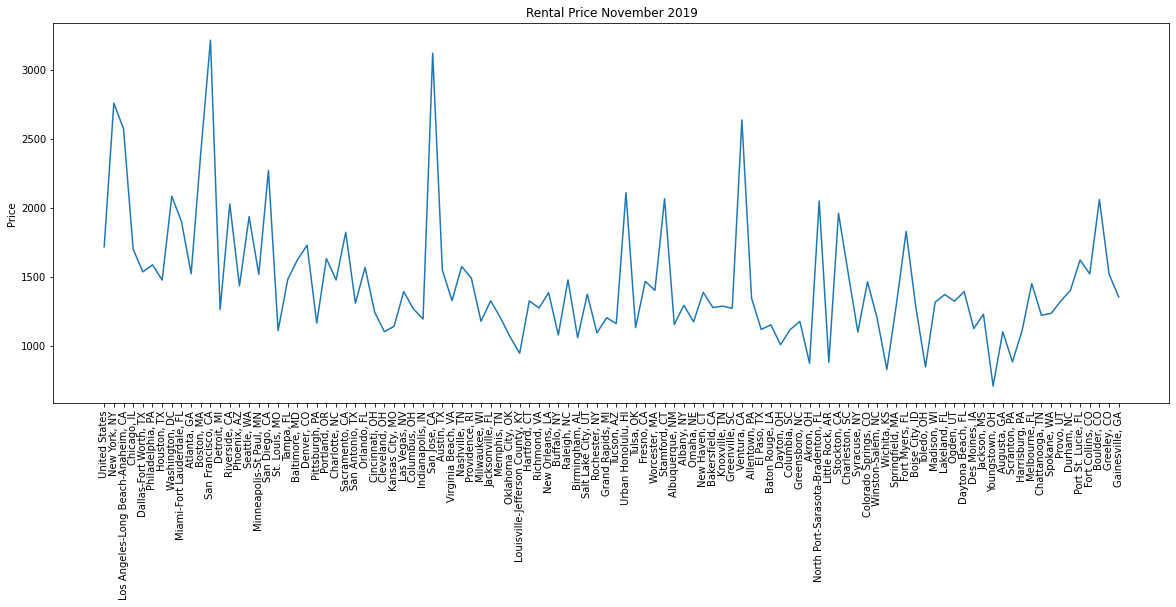

In [73]:
plt.figure(figsize=(20, 7))
plt.plot(rentals['RegionName'], rentals['2019-11'])
plt.title("Rental Price November 2019")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

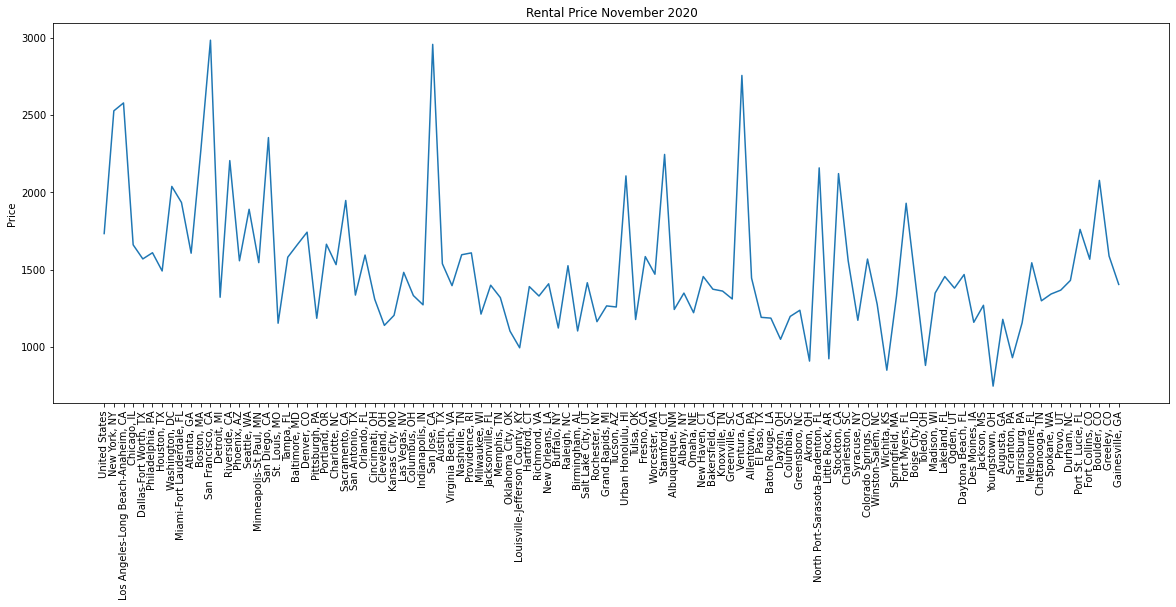

In [74]:
plt.figure(figsize=(20, 7))
plt.plot(rentals['RegionName'], rentals['2020-11'])
plt.title("Rental Price November 2020")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [75]:
features_with_nan = [features for features in rentals.columns if rentals[features].isnull().sum() >= 1]
features_with_nan

['2014-01']